```
Copyright (C) 2024-2025 Yucheng Liu. Under the GNU AGPL 3.0 License.
GNU AGPL 3.0 License: https://www.gnu.org/licenses/agpl-3.0.txt .

Copyright (C) 2024-2025 Yucheng Liu. Under the CC-BY-SA 4.0 License.
CC-BY-SA 4.0 License: https://creativecommons.org/licenses/by-sa/4.0/legalcode.txt .
```

# 2.1. Analyzing All Users' Angular Velocity Data

Analyzing all users' VR sickness vs. VR locomotion angular velocity data.

Note the following items.

- We need to run `./_0_1_Data_Shared_Prepare.ipynb` before running the below code blocks.
- Then, we need to run `./_2_0_Data_AngularVelocity_AllUsers_Prepare.ipynb` before running the below code blocks.

Read the following data files to analyze from the `./_2_Data_AngularVelocity_AllUsers` folder.

- `AllUsers_ToAnalyze.json`.

Preprocess the following data files to analyze from the `./_2_Data_AngularVelocity_AllUsers` folder.

- `AllUsers_ToAnalyze.json`.
  - Create a copy of column `"Sickness"` called `"SicknessCategory"` of type `category`.

Analyze the preprocessed data by going through the following steps.

- We marked each step with code comments.
- Read the preprocessed data.
- Compute textual descriptive statistics of `"AngularVelocity"`.
- Compute a graphical category plot of the `"AngularVelocity"` data.
- Compute textual descriptive statistics of the `"AngularVelocity"` vs. `SicknessCategory == "0"` data.
- Compute textual descriptive statistics of the `"AngularVelocity"` vs. `SicknessCategory == "1"` data.
- Compute textual summary of compare means statistical tests on `"AngularVelocity"` items with `SicknessCategory == "0"` vs `SicknessCategory == "1"`.
- Compute a graphical category plot of the `"AngularVelocity"` vs. `SicknessCategory` data.
- Compute textual linear regression statistics of the `"AngularVelocity"` vs. `"Sickness"` data.
- Compute a graphical linear regression plot of the `"AngularVelocity"` vs. `"Sickness"` data.
- Compute textual [polynomial regression order 4] statistics of the `"AngularVelocity"` vs. `"Sickness"` data.
- Compute a graphical [polynomial regression order 4] plot of the `"AngularVelocity"` vs. `"Sickness"` data.
- Compute textual logistic regression statistics of the `"AngularVelocity"` vs. `"Sickness"` data.
- Compute a graphical logistic regression plot of the `"AngularVelocity"` vs. `"Sickness"` data.
- Complete analyzing the preprocessed data.

Begin analyzing data for all users
Begin Data_
               Time  AngularVelocity      Sickness
count  24221.000000     2.422100e+04  24221.000000
mean     520.280328     1.962517e+01      0.269229
std      297.902077     1.666375e+01      0.443568
min        0.000000     1.884189e-09      0.000000
25%      264.144470     5.051496e+00      0.000000
50%      520.988914     1.366549e+01      0.000000
75%      778.422266     3.312773e+01      1.000000
max     1032.511156     1.228169e+02      1.000000
End Data_
Begin Data_WithSickness
              Time  AngularVelocity  Sickness
count  6521.000000      6521.000000    6521.0
mean    414.259411        31.154058       1.0
std     263.093430        15.106576       0.0
min       9.444458         0.289031       1.0
25%     202.955505        21.580330       1.0
50%     396.222246        32.306492       1.0
75%     575.244467        41.256260       1.0
max     973.166712       122.816933       1.0
End Data_WithSickness
Begin Data_WithoutSickne

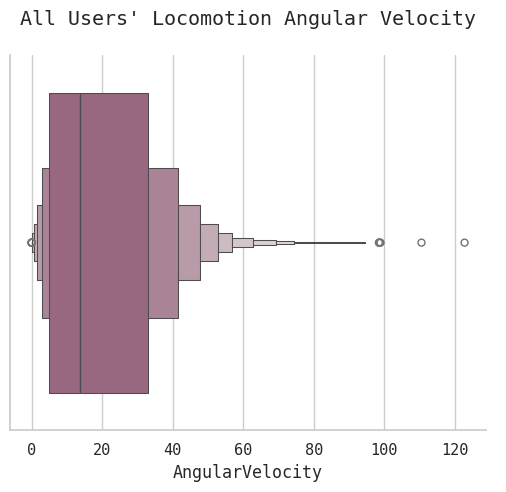


All Users' Locomotion Angular Velocity (Without-sickness)
Descriptive Statistics
count    1.770000e+04
mean     1.537772e+01
std      1.512970e+01
min      1.884189e-09
25%      4.077892e+00
50%      8.423742e+00
75%      2.527090e+01
max      1.105904e+02
Name: AngularVelocity, dtype: float64





All Users' Locomotion Angular Velocity (With-sickness)
Descriptive Statistics
count    6521.000000
mean       31.154058
std        15.106576
min         0.289031
25%        21.580330
50%        32.306492
75%        41.256260
max       122.816933
Name: AngularVelocity, dtype: float64





All Users' Locomotion Angular Velocity
[With-sickness vs. Without-sickness]
Compare Means Statistical Tests
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1    -15.7763      0.219    -72.062      0.000     -16.20

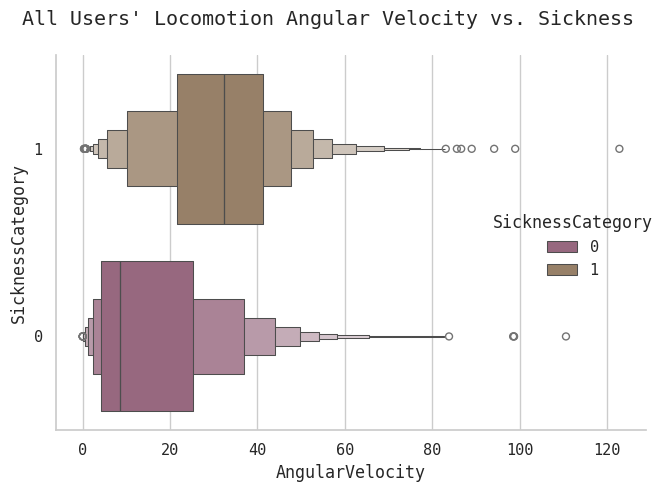


All Users' [Locomotion Angular Velocity - Sickness]
Linear Regression
                            GLS Regression Results                            
Dep. Variable:               Sickness   R-squared:                       0.176
Model:                            GLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     5186.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:55:25   Log-Likelihood:                -12329.
No. Observations:               24221   AIC:                         2.466e+04
Df Residuals:                   24219   BIC:                         2.468e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

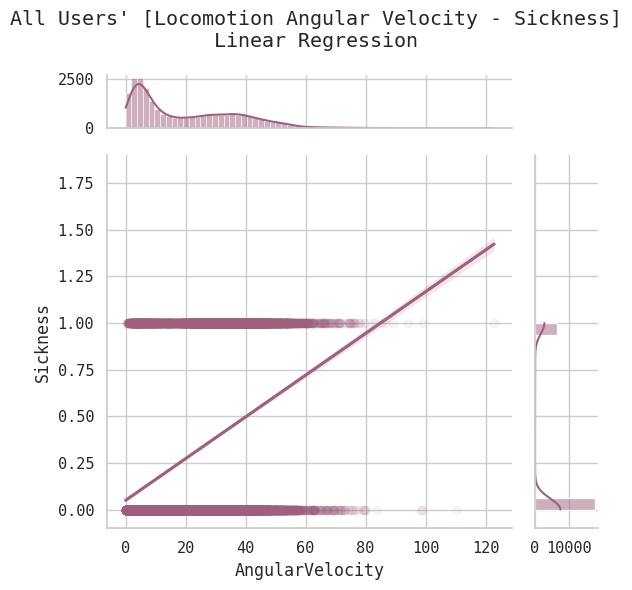


All Users' [Locomotion Angular Velocity - Sickness]
[Ploynominal Regression Order 4]
                            GLS Regression Results                            
Dep. Variable:               Sickness   R-squared:                       0.192
Model:                            GLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     1440.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:55:27   Log-Likelihood:                -12093.
No. Observations:               24221   AIC:                         2.420e+04
Df Residuals:                   24216   BIC:                         2.424e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

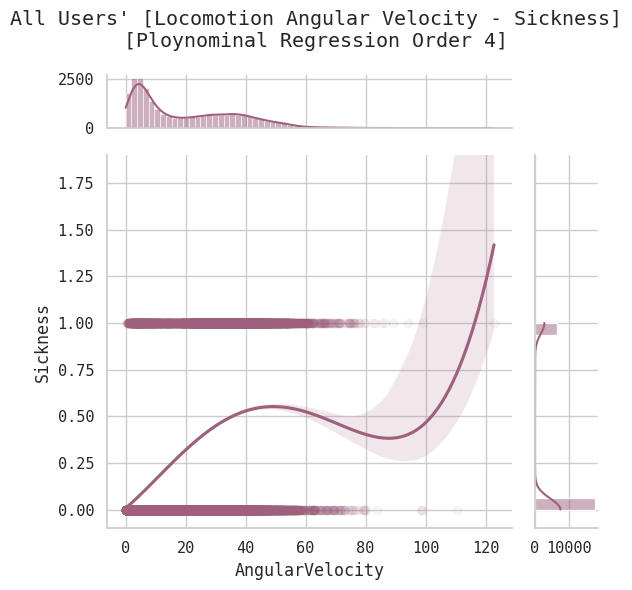

Optimization terminated successfully.
         Current function value: 0.495071
         Iterations 6

All Users' [Locomotion Angular Velocity - Sickness]
Logistic Regression
                           Logit Regression Results                           
Dep. Variable:               Sickness   No. Observations:                24221
Model:                          Logit   Df Residuals:                    24219
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                  0.1501
Time:                        19:55:30   Log-Likelihood:                -11991.
converged:                       True   LL-Null:                       -14109.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3386      0.030   

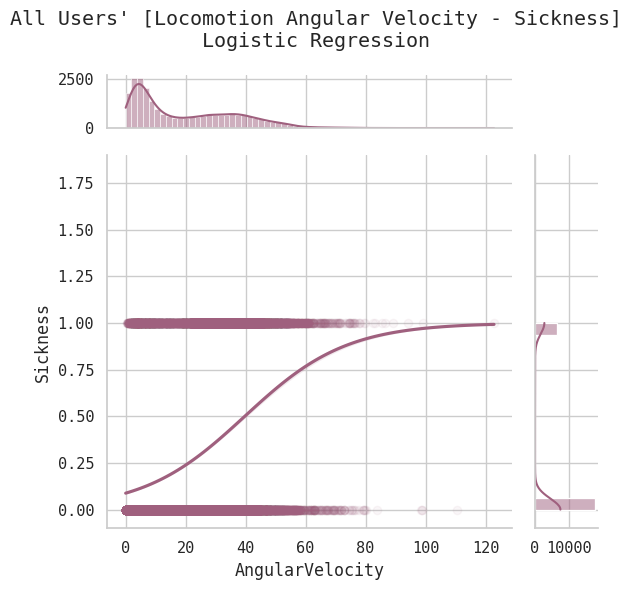

End analyzing data for all users







In [1]:
import json
import os
import sys

import numpy
import pandas
import sklearn.preprocessing as SKLearn_Preprocess
import statsmodels.api as StatsModels_API
import statsmodels.stats.weightstats as StatsModels_WeightStats
import seaborn
import matplotlib.pyplot as pyplot

# %matplotlib inline

Path_Self = os.path.abspath(os.path.curdir)
Path_Input = os.path.join(Path_Self, "_2_Data_AngularVelocity_AllUsers")
Path_Output = os.path.join(Path_Self, "Figures_Computed")
os.makedirs(Path_Output, exist_ok=True)
Path_Output_Texts = os.path.join(Path_Self, "Texts_Computed")
os.makedirs(Path_Output_Texts, exist_ok=True)
Path_Output_Text = os.path.join(Path_Output_Texts, "_2_1_Text_AngularVelocity_AllUsers.txt")
File_Output_Text = open(Path_Output_Text, "w+")

def print_(*args, **kwargs):
    Files = [
        sys.stdout,
        File_Output_Text,
    ]

    for File_ in Files:
        kwargs["file"] = File_
        print(*args, **kwargs)
        File_.flush()
    # end for
# end def

print_(f"Begin analyzing data for all users")

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Read the preprocessed data.

Path_Input_Users = os.path.join(Path_Input, f"AllUsers_ToAnalyze.json")
Path_Output_Users = os.path.join(Path_Output, f"AllUsers")
os.makedirs(Path_Output_Users, exist_ok=True)

def Path_Output_Figure_Find(Path_):
    return os.path.join(Path_Output_Users, Path_)
# end def

Data_ = pandas.read_json(Path_Input_Users)
Data_["SicknessCategory"] = Data_["Sickness"].astype("category")

print_(
    "Begin Data_\n"
    + Data_.describe().__str__()
    + "\nEnd Data_"
)

Data_WithSickness = Data_[Data_["SicknessCategory"] == 1]

print_(
    "Begin Data_WithSickness\n"
    + Data_WithSickness.describe().__str__()
    + "\nEnd Data_WithSickness"
)

Data_WithoutSickness = Data_[Data_["SicknessCategory"] == 0]

print_(
    "Begin Data_WithoutSickness\n"
    + Data_WithoutSickness.describe().__str__()
    + "\nEnd Data_WithoutSickness"
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute textual descriptive statistics of `"AngularVelocity"`.

print_(
    "\n"
    + f"All users' Locomotion Angular Velocity\n"
    + "Descriptive Statistics\n"
    + Data_["AngularVelocity"].describe().__str__()
    + "\n"
)

print_("\n\n")

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute a graphical category plot of the `"AngularVelocity"` data.

ColorMap = seaborn.hls_palette(
    n_colors=6,
    h=0.92,
    l=0.50,
    s=0.25,
)

Palette_ = seaborn.color_palette(ColorMap)

seaborn.set_theme(
    context="notebook",
    style="whitegrid",
    palette=Palette_,
    font="monospace",
)

Plot = seaborn.catplot(
    data=Data_,
    x="AngularVelocity",
    kind="boxen",
    native_scale=True,
)

Plot.figure.suptitle(f"All Users' Locomotion Angular Velocity")
pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMovAngVel_Stats.png"),
    dpi=Plot.figure.dpi,
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute textual descriptive statistics of the `"AngularVelocity"` vs. `SicknessCategory == "0"` data.

print_(
    "\n"
    + f"All Users' Locomotion Angular Velocity (Without-sickness)\n"
    + "Descriptive Statistics\n"
    + Data_WithoutSickness["AngularVelocity"].describe().__str__()
    + "\n"
)

print_("\n\n")

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute textual descriptive statistics of the `"AngularVelocity"` vs. `SicknessCategory == "1"` data.

print_(
    "\n"
    + f"All Users' Locomotion Angular Velocity (With-sickness)\n"
    + "Descriptive Statistics\n"
    + Data_WithSickness["AngularVelocity"].describe().__str__()
    + "\n"
)

print_("\n\n")

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute textual summary of compare means statistical tests on `"AngularVelocity"` items with `SicknessCategory == "0"` vs `SicknessCategory == "1"`.

CompareMeans = StatsModels_WeightStats.CompareMeans(
    StatsModels_WeightStats.DescrStatsW(Data_WithoutSickness["AngularVelocity"]),
    StatsModels_WeightStats.DescrStatsW(Data_WithSickness["AngularVelocity"]),
)

print_(
    "\n"
    + f"All Users' Locomotion Angular Velocity\n"
    + "[With-sickness vs. Without-sickness]\n"
    + "Compare Means Statistical Tests\n"

    + CompareMeans.summary(
        use_t=True,
        alpha=0.05,
        usevar="unequal",
        value=0.0
    ).__str__()

    + "\n"
)

print_("\n\n")

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute a graphical category plot of the `"AngularVelocity"` vs. `SicknessCategory` data.

Plot = seaborn.catplot(
    data=Data_,
    x="AngularVelocity",
    y="SicknessCategory",
    hue="SicknessCategory",
    kind="boxen",
    order=[1, 0],
    native_scale=True,
)

Plot.figure.suptitle(f"All Users' Locomotion Angular Velocity vs. Sickness")
pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMovAngVel_VsSick_Stats.png"),
    dpi=Plot.figure.dpi,
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute textual linear regression statistics of the `"AngularVelocity"` vs. `"Sickness"` data.

Data_Sickness = Data_["Sickness"]
Data_AngularVelocity = Data_["AngularVelocity"]
Polynominal = SKLearn_Preprocess.PolynomialFeatures(degree=1)

Data_AngularVelocity = Polynominal.fit_transform(
    Data_AngularVelocity.to_numpy().reshape(-1, 1)
)

Regression_Model = StatsModels_API.GLS(Data_Sickness, Data_AngularVelocity)
Regression_Results = Regression_Model.fit()

print_(
    "\n"
    + f"All Users' [Locomotion Angular Velocity - Sickness]\n"
    + "Linear Regression\n"
    + Regression_Results.summary().__str__()
    + "\n"
)

print_("\n\n")

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute a graphical linear regression plot of the `"AngularVelocity"` vs. `"Sickness"` data.

Plot = seaborn.jointplot(
    data=Data_,
    x="AngularVelocity",
    y="Sickness",
    kind="reg",
    ylim=[-0.1, 1.9],
    marginal_ticks=True,
    joint_kws={
        "order": 1,
        
        "scatter_kws": {
            "alpha": 0.05
        },
    },
)

Plot.figure.suptitle(
    f"All Users' [Locomotion Angular Velocity - Sickness]\n"
    + "Linear Regression"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMovAngVel_VsSick_LinReg.png"),
    dpi=Plot.figure.dpi,
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute textual [polynomial regression order 4] statistics of the `"AngularVelocity"` vs. `"Sickness"` data.

Data_Sickness = Data_["Sickness"]
Data_AngularVelocity = Data_["AngularVelocity"]
Polynominal = SKLearn_Preprocess.PolynomialFeatures(degree=4)

Data_AngularVelocity = Polynominal.fit_transform(
    Data_AngularVelocity.to_numpy().reshape(-1, 1)
)

Data_AngularVelocity = StatsModels_API.add_constant(Data_AngularVelocity, prepend=False)
Regression_Model = StatsModels_API.GLS(Data_Sickness, Data_AngularVelocity)
Regression_Results = Regression_Model.fit()

print_(
    "\n"
    + f"All Users' [Locomotion Angular Velocity - Sickness]\n"
    + "[Ploynominal Regression Order 4]\n"
    + Regression_Results.summary().__str__()
    + "\n"
)

print_("\n\n")

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute a graphical [polynomial regression order 4] plot of the `"AngularVelocity"` vs. `"Sickness"` data.

Plot = seaborn.jointplot(
    data=Data_,
    x="AngularVelocity",
    y="Sickness",
    kind="reg",
    ylim=[-0.1, 1.9],
    marginal_ticks=True,
    joint_kws={
        "order": 4,
        
        "scatter_kws": {
            "alpha": 0.05
        },
    },
)

Plot.figure.suptitle(
    f"All Users' [Locomotion Angular Velocity - Sickness]\n"
    + "[Ploynominal Regression Order 4]"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMovAngVel_VsSick_PolyReg.png"),
    dpi=Plot.figure.dpi,
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute textual logistic regression statistics of the `"AngularVelocity"` vs. `"Sickness"` data.

Data_Sickness = Data_["Sickness"]
Data_AngularVelocity = Data_["AngularVelocity"]
Polynominal = SKLearn_Preprocess.PolynomialFeatures(degree=1)

Data_AngularVelocity = Polynominal.fit_transform(
    Data_AngularVelocity.to_numpy().reshape(-1, 1)
)

Data_AngularVelocity = StatsModels_API.add_constant(Data_AngularVelocity, prepend=False)
Regression_Model = StatsModels_API.Logit(Data_Sickness, Data_AngularVelocity)
Regression_Results = Regression_Model.fit()

print_(
    "\n"
    + f"All Users' [Locomotion Angular Velocity - Sickness]\n"
    + "Logistic Regression\n"
    + Regression_Results.summary().__str__()
    + "\n"
)

print_("\n\n")

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute a graphical logistic regression plot of the `"AngularVelocity"` vs. `"Sickness"` data.

Plot = seaborn.jointplot(
    data=Data_,
    x="AngularVelocity",
    y="Sickness",
    kind="reg",
    ylim=[-0.1, 1.9],
    marginal_ticks=True,
    
    joint_kws={
        "logistic": True,
        
        "scatter_kws": {
            "alpha": 0.05
        },
    },
)

Plot.figure.suptitle(
    f"All Users' [Locomotion Angular Velocity - Sickness]\n"
    + "Logistic Regression"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMovAngVel_VsSick_LogReg.png"),
    dpi=Plot.figure.dpi,
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Complete analyzing the preprocessed data.

print_(f"End analyzing data for all users")
print_("\n\n\n\n")

File_Output_Text.close()


## Congrats! 

We have completed this `ipynb` notebook.